In [33]:
import pandas as pd
import numpy as np
import math as m

import matplotlib.pyplot as plt 
import seaborn as sns

In [34]:
figsize = (12, 8)

In [35]:
df_freq = pd.read_csv("cleaned_data.csv")
df_freq

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Area,VehBrand,VehGas,Region,ClaimFrequency
0,1.0,0.10000,5.0,0.0,55.0,50.0,1217.0,D,B12,Regular,R82,1.000000
1,1.0,0.77000,5.0,0.0,55.0,50.0,1217.0,D,B12,Regular,R82,1.298701
2,1.0,0.75000,6.0,2.0,52.0,50.0,54.0,B,B12,Diesel,R22,1.333333
3,1.0,0.84000,7.0,0.0,46.0,50.0,76.0,B,B12,Diesel,R72,1.190476
4,1.0,0.52000,6.0,2.0,38.0,50.0,3003.0,E,B12,Regular,R31,1.923077
...,...,...,...,...,...,...,...,...,...,...,...,...
677997,0.0,0.00274,4.0,0.0,54.0,50.0,3317.0,E,B12,Regular,R93,0.000000
677998,0.0,0.00274,4.0,0.0,41.0,95.0,9850.0,E,B12,Regular,R11,0.000000
677999,0.0,0.00274,6.0,2.0,45.0,50.0,1323.0,D,B12,Diesel,R82,0.000000
678000,0.0,0.00274,4.0,0.0,60.0,50.0,95.0,B,B12,Regular,R26,0.000000


In [36]:
df_freq.describe()

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimFrequency
count,678002.000000,678002.000000,678002.000000,678002.000000,678002.000000,678002.000000,678002.000000,678002.000000
mean,0.053189,0.528748,6.454637,6.953527,45.444456,59.761574,1792.442657,0.076323
std,0.238196,0.364441,2.050914,5.397595,14.038690,15.636724,3958.673690,0.383057
min,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000
25%,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000
50%,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000
75%,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000
max,5.000000,2.010000,15.000000,25.000000,87.000000,230.000000,27000.000000,15.151515


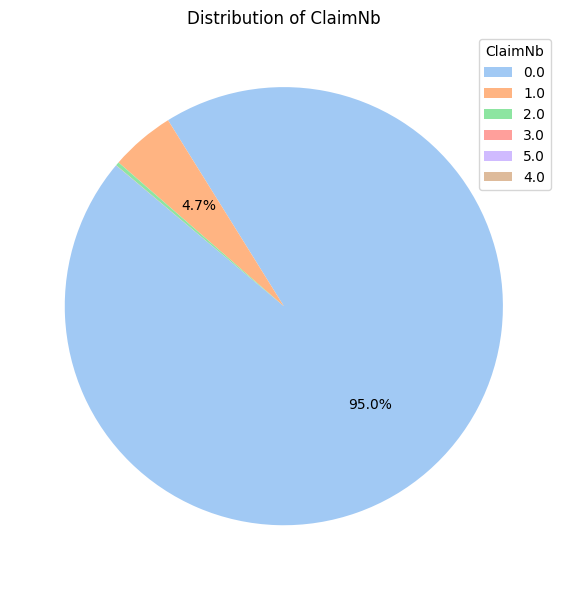

In [37]:
sns.set_palette("pastel")
freq_counts = df_freq["ClaimNb"].value_counts()
plt.figure(figsize=(6, 6))

wedges, _, autotexts = plt.pie(
    freq_counts, labels=None, 
    autopct=lambda x: f"{x:.1f}%" if x >= 4.7 else "", 
    startangle=140
)

plt.title("Distribution of ClaimNb")
plt.legend(wedges, freq_counts.index, title="ClaimNb", loc="upper right")

plt.tight_layout()
plt.show()

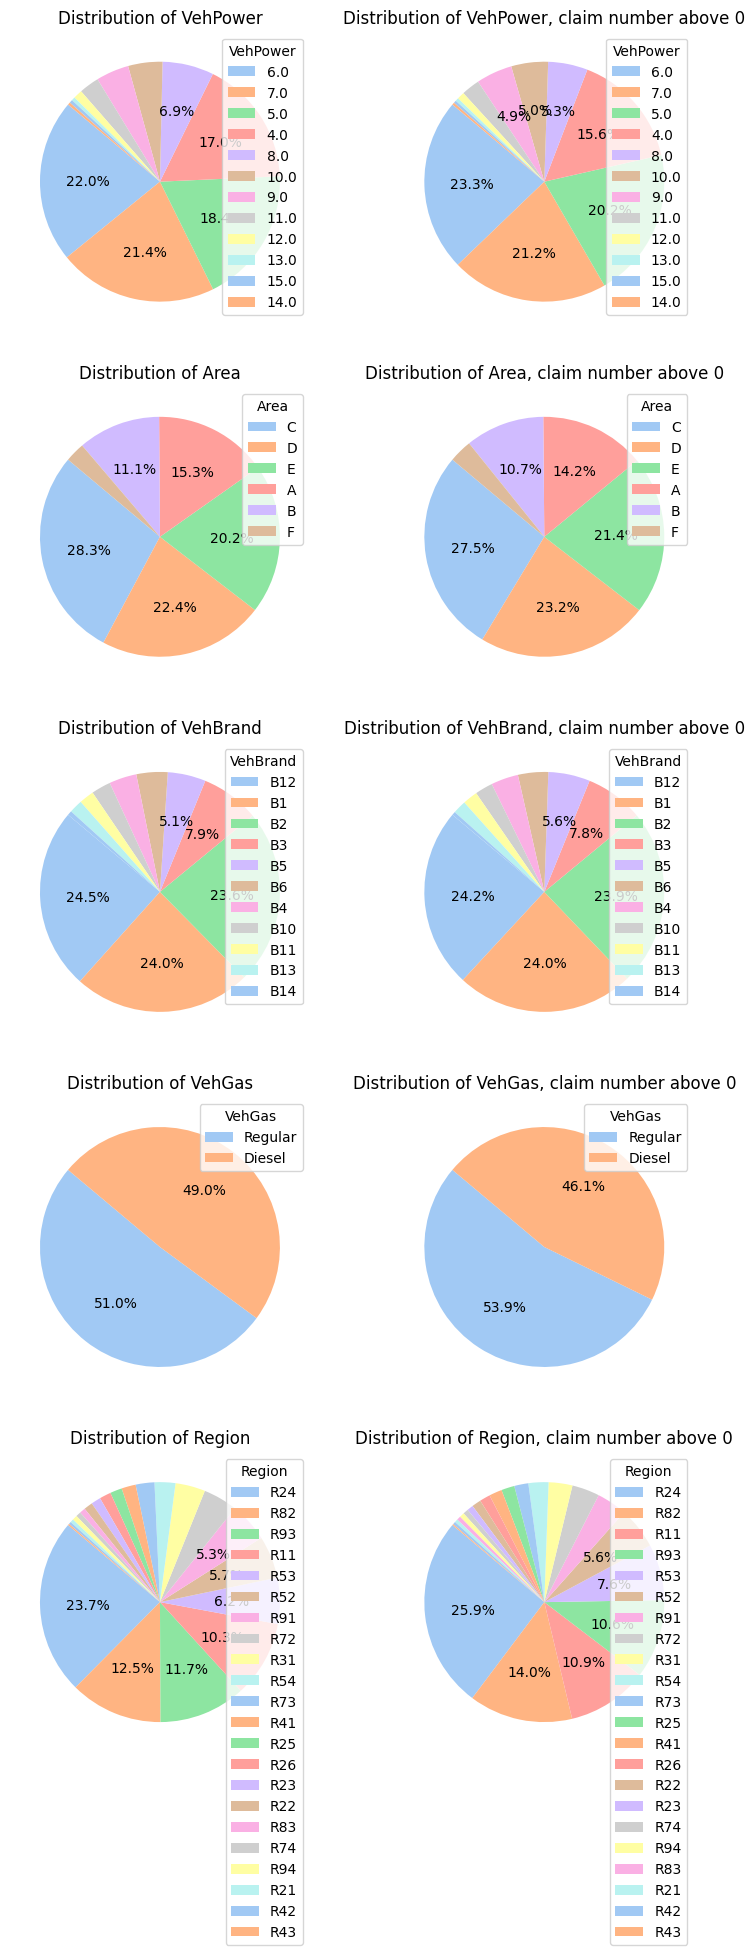

In [38]:
pie_chart_vars = ["VehPower", "Area", "VehBrand", "VehGas", "Region"]
n_cols = 2
n_rows = len(pie_chart_vars)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
sns.set_palette("pastel")

for i, var in enumerate(pie_chart_vars):
    # Get unique category labels
    all_categories = df_freq[var].value_counts().index  # Sorted automatically by frequency

    # Assign consistent colors
    color_palette = sns.color_palette("pastel", len(all_categories))
    color_mapping = {cat: color for cat, color in zip(all_categories, color_palette)}

    # All data distribution
    freq_counts_all = df_freq[var].value_counts()
    sorted_categories_all = freq_counts_all.index  # Ensure sorting is consistent
    colors_all = [color_mapping[cat] for cat in sorted_categories_all]

    wedges, _, autotexts = axes[i, 0].pie(
        freq_counts_all, labels=None, 
        autopct=lambda x: f"{x:.1f}%" if x >= 4.7 else "", startangle=140, colors=colors_all
    )
    axes[i, 0].set_title(f"Distribution of {var}")
    axes[i, 0].legend(wedges, sorted_categories_all, title=var, loc="upper right")

    # Data distribution where ClaimNb > 0
    freq_counts_claim = df_freq[df_freq["ClaimNb"] > 0][var].value_counts()
    sorted_categories_claim = freq_counts_claim.index
    colors_claim = [color_mapping.get(cat, "gray") for cat in sorted_categories_claim]

    wedges, _, autotexts = axes[i, 1].pie(
        freq_counts_claim, labels=None, 
        autopct=lambda x: f"{x:.1f}%" if x >= 4.7 else "", startangle=140, colors=colors_claim
    )
    axes[i, 1].set_title(f"Distribution of {var}, claim number above 0")
    axes[i, 1].legend(wedges, sorted_categories_claim, title=var, loc="upper right")

# Remove any unused subplots
for j in range(i + 1, n_rows):
    for k in range(n_cols):
        fig.delaxes(axes[j, k])

plt.tight_layout()
plt.show()

In [39]:
def display_correlation_matrix(data: pd.DataFrame, figsize=figsize):
    cor_matrix = data.select_dtypes(include=[np.number]).corr()
    f, ax = plt.subplots(figsize=figsize)
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    sns.heatmap(cor_matrix, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

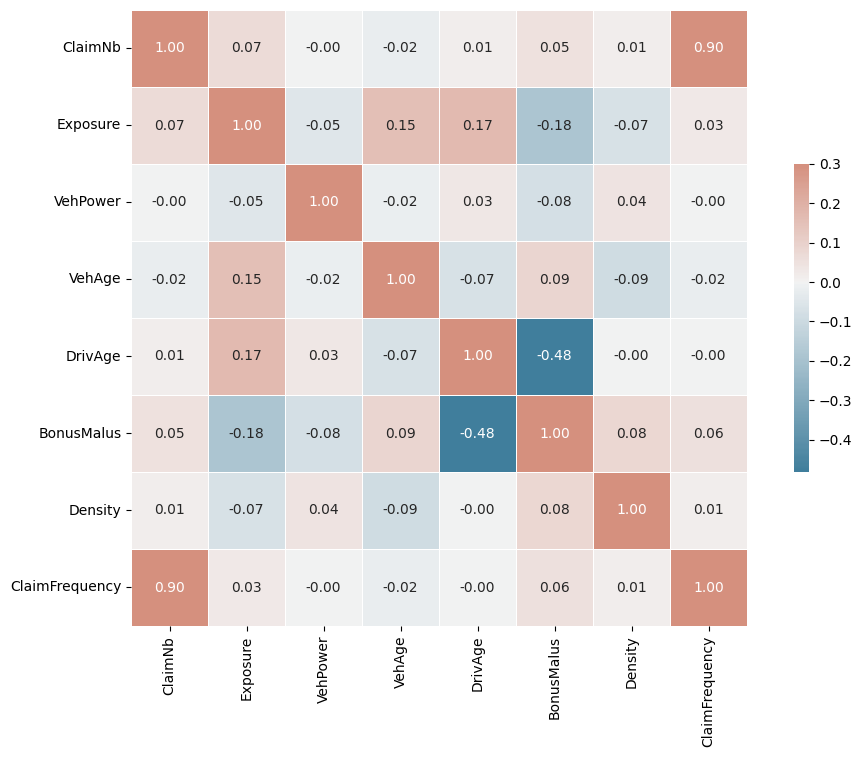

In [40]:
display_correlation_matrix(df_freq)

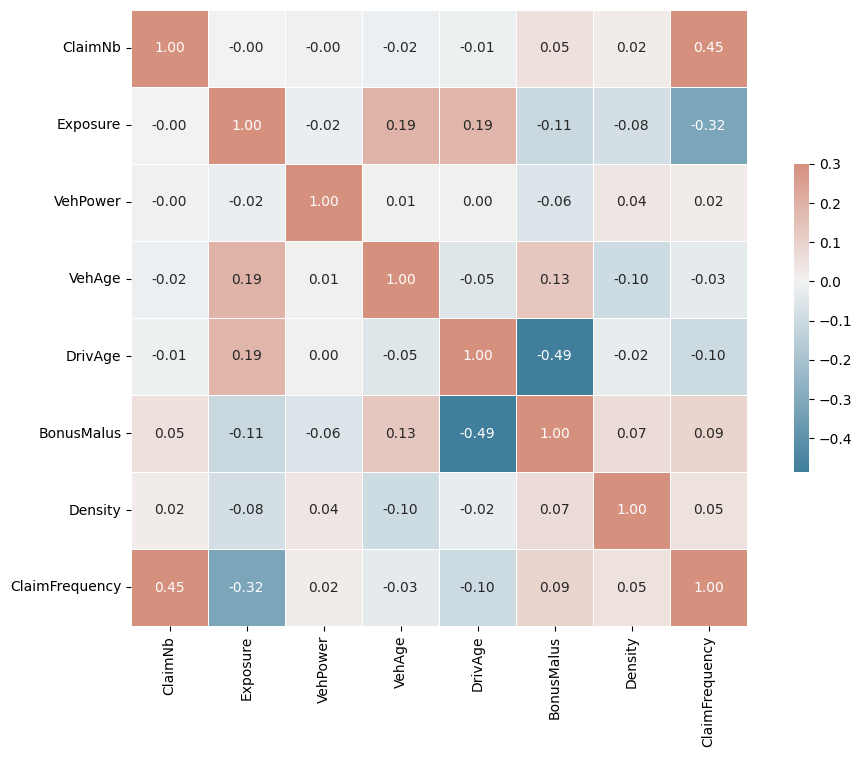

In [41]:
df_freq_positive = df_freq[df_freq["ClaimFrequency"] > 0]
display_correlation_matrix(df_freq_positive)

In [42]:
def display_scatterplots(y: str, variables: list, data=df_freq, figsize=figsize):
    n_cols = 3
    n_rows = m.ceil((len(variables) + 1) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, var in enumerate(variables):
        sns.scatterplot(data=data, x=var, y=y, ax=axes[i], alpha=0.4)
        axes[i].set_title(f'{y} vs {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel(y)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

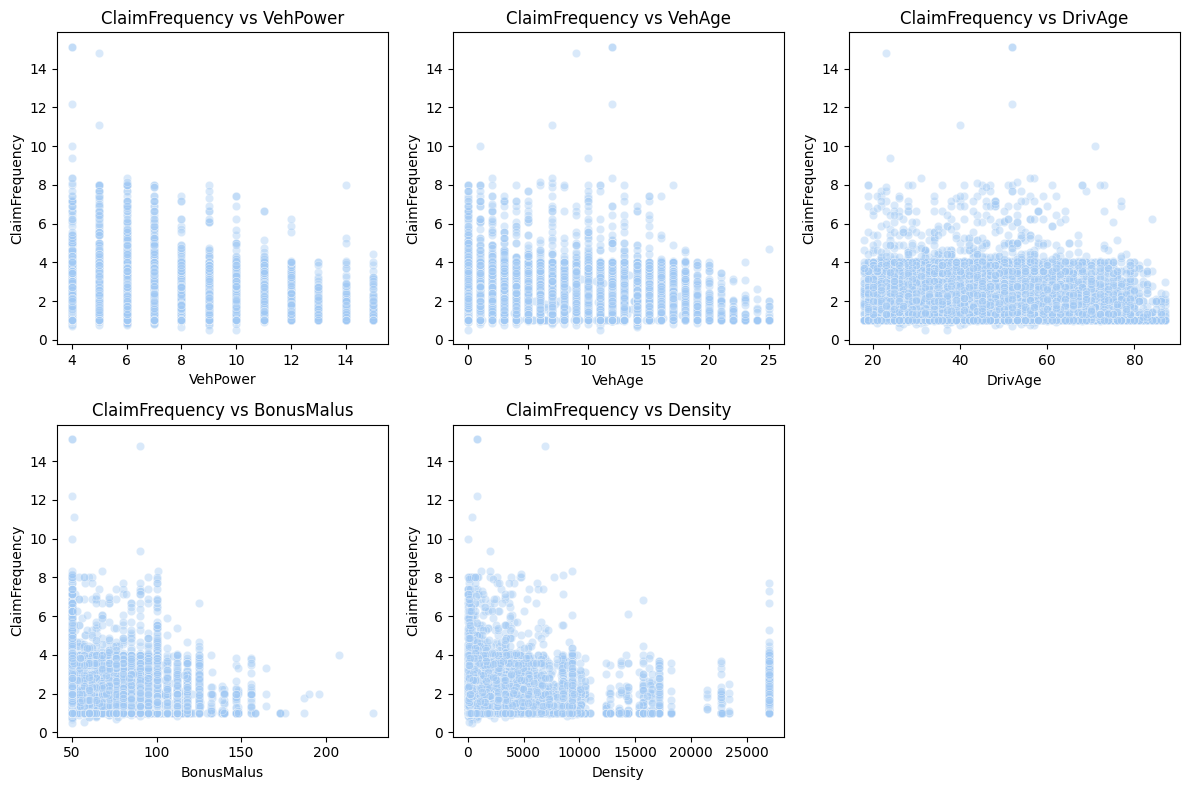

In [43]:
display_scatterplots(data=df_freq_positive, y="ClaimFrequency", variables=["VehPower", "VehAge", "DrivAge", "BonusMalus", "Density"])

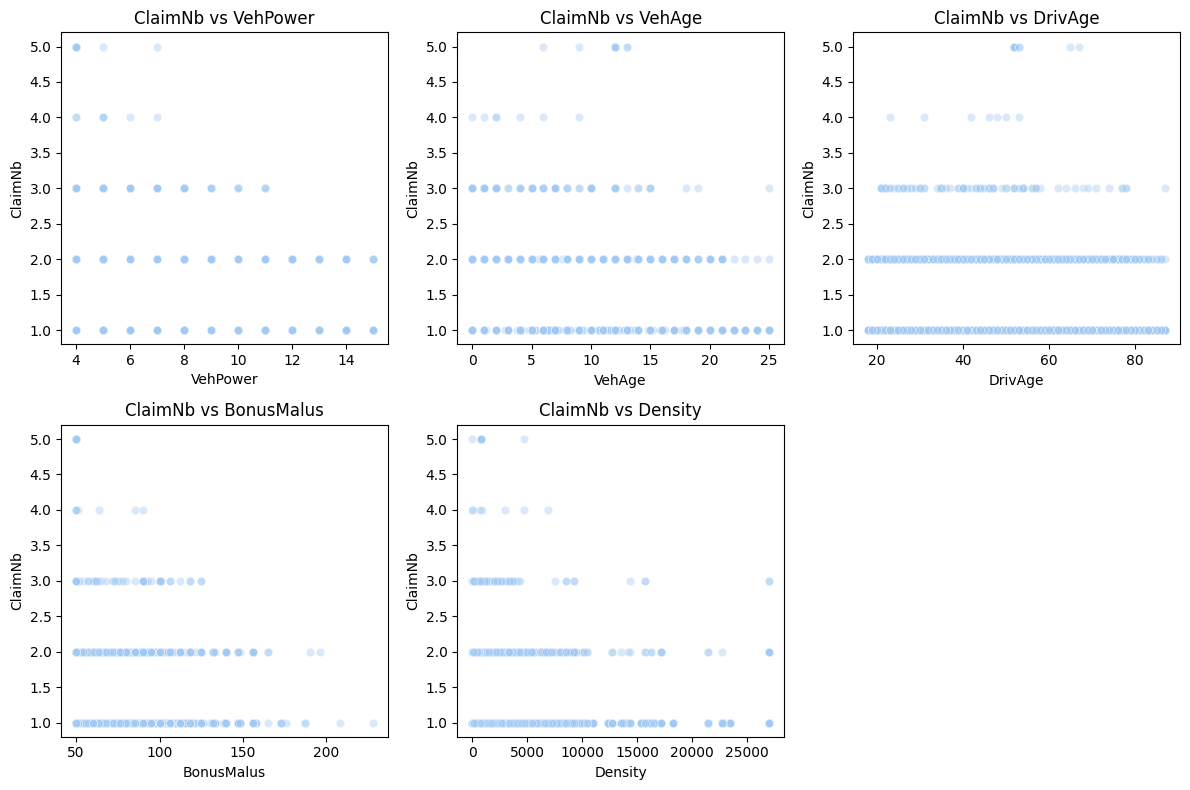

In [44]:
display_scatterplots(data=df_freq_positive ,y="ClaimNb", variables=["VehPower", "VehAge", "DrivAge", "BonusMalus", "Density"])

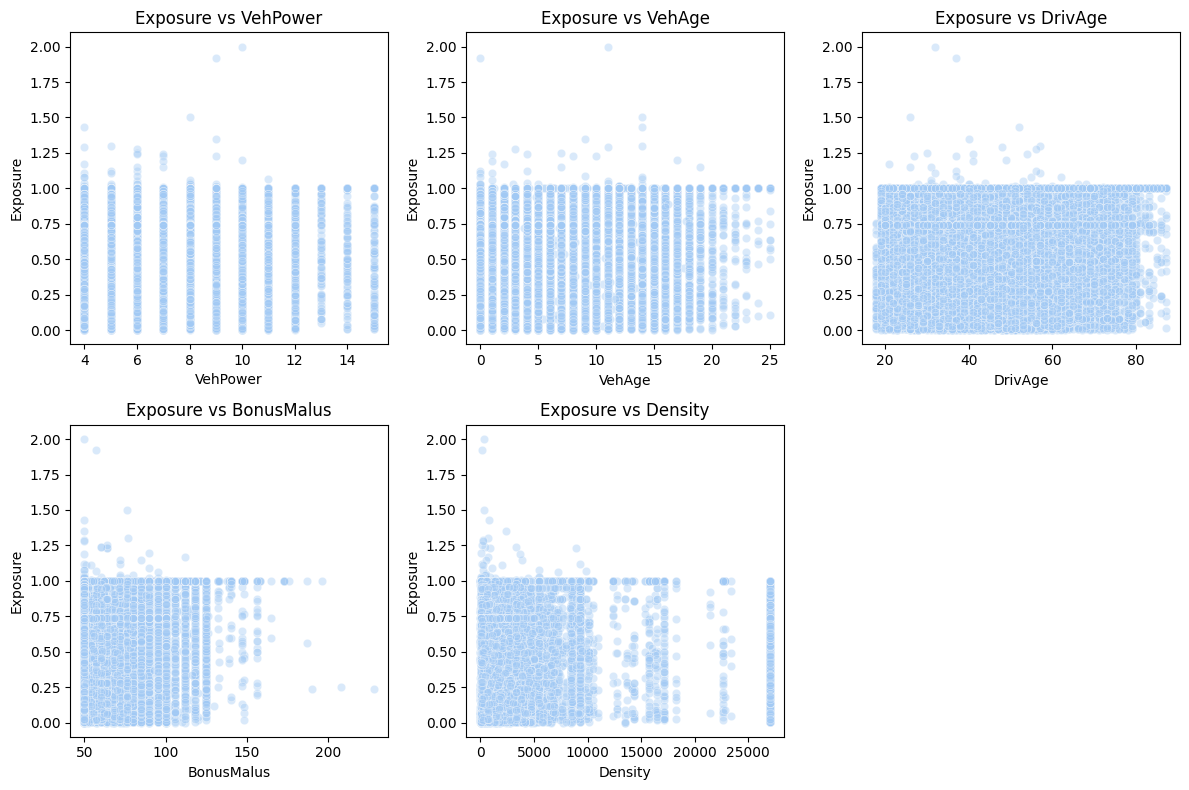

In [45]:
display_scatterplots(data=df_freq_positive, y="Exposure", variables=["VehPower", "VehAge", "DrivAge", "BonusMalus", "Density"])

In [46]:
def display_stripplots(y: str, variables: list, data=df_freq, figsize=figsize):
    n_cols = 3
    n_rows = m.ceil((len(variables) + 1) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, var in enumerate(variables):
        sns.stripplot(data=data, x=var, y=y, ax=axes[i], zorder=2)
        axes[i].set_title(f'{y} vs {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel(y)

        category_means = data.groupby(var)[y].mean()
        xticks = {cat: idx for idx, cat in enumerate(data[var].unique())}  # Map categories to positions
        
        for cat, mean_val in category_means.items():
            if cat in xticks:
                axes[i].plot([xticks[cat] - 0.2, xticks[cat] + 0.2], [mean_val, mean_val], 
                             color='red', linewidth=1.5, alpha=0.9, zorder=3)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

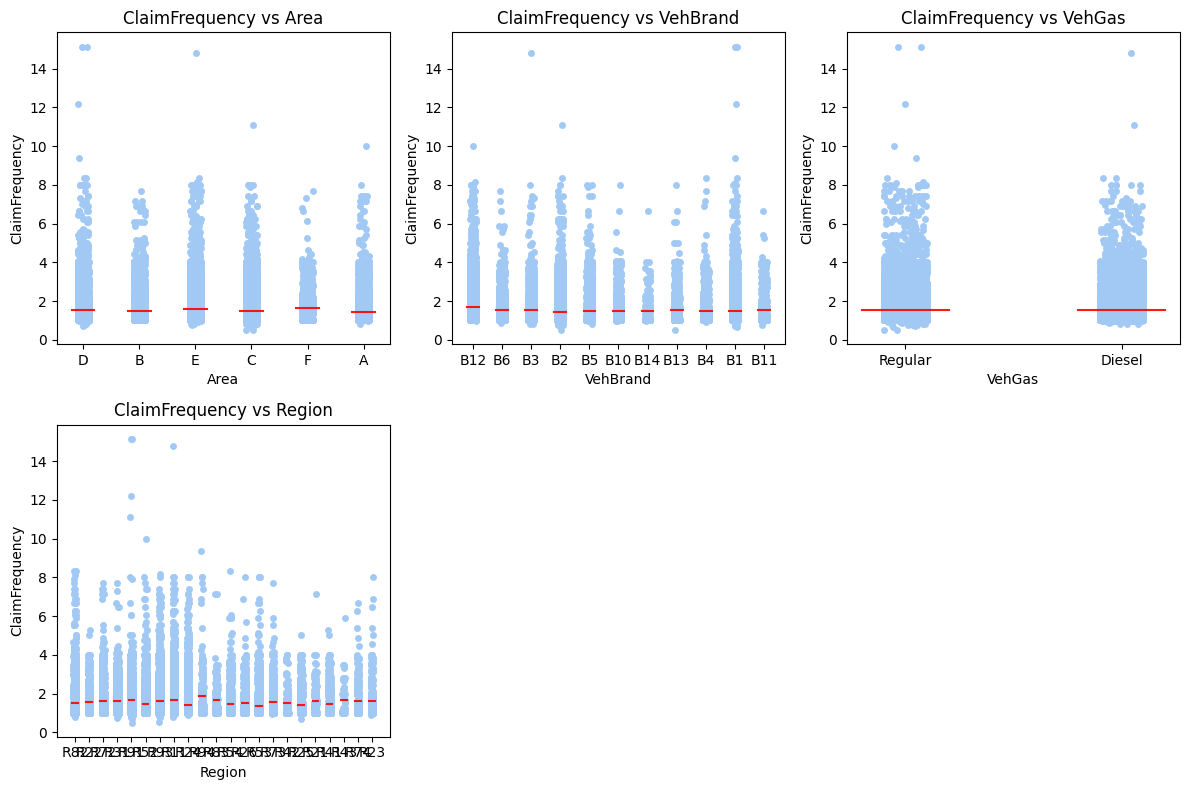

In [47]:
display_stripplots(data=df_freq_positive, y="ClaimFrequency", variables=["Area", "VehBrand", "VehGas", "Region"])

In [48]:
df_freq.groupby("Region")['ClaimFrequency'].mean().sort_values()

Region
R23    0.052291
R83    0.057551
R73    0.059263
R91    0.064593
R41    0.065014
R72    0.065079
R31    0.065259
R43    0.067986
R26    0.069572
R54    0.071450
R52    0.072481
R93    0.074757
R24    0.077348
R21    0.078265
R25    0.078614
R22    0.083471
R42    0.084153
R53    0.084371
R82    0.085078
R74    0.085936
R11    0.087885
R94    0.091826
Name: ClaimFrequency, dtype: float64

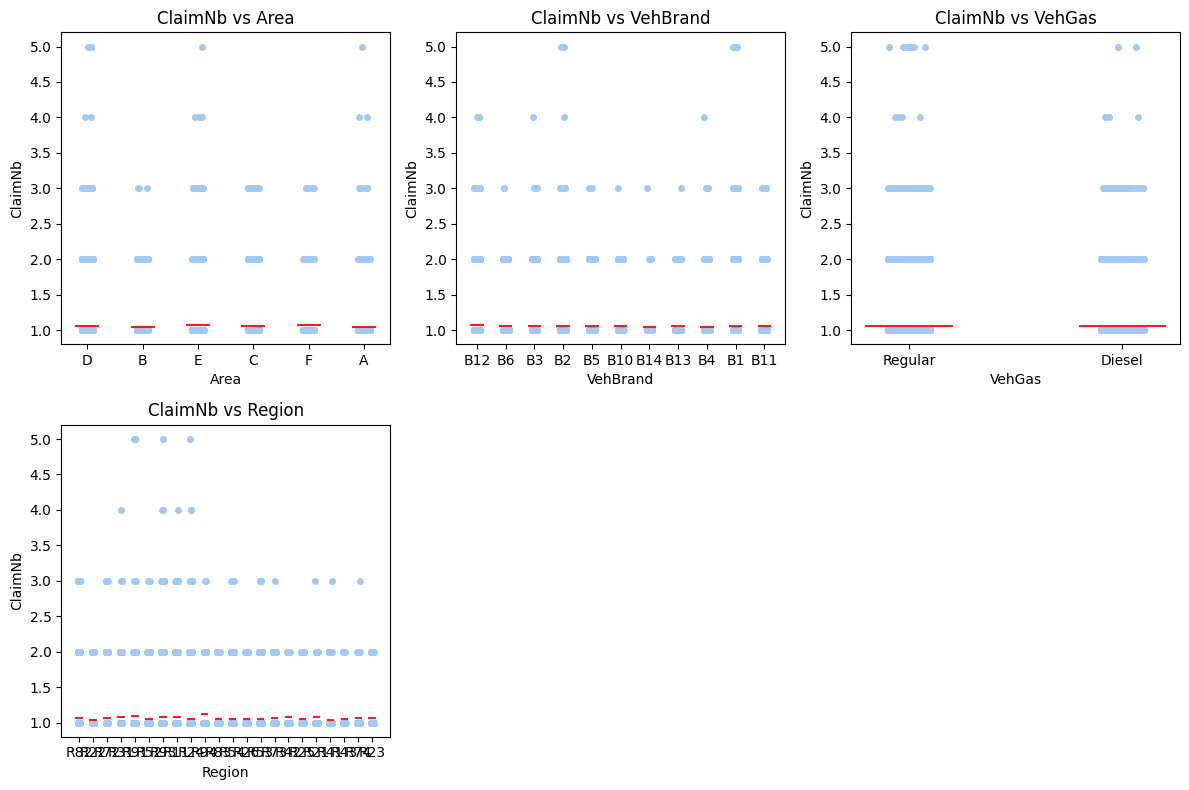

In [49]:
display_stripplots(data=df_freq_positive, y="ClaimNb", variables=["Area", "VehBrand", "VehGas", "Region"])

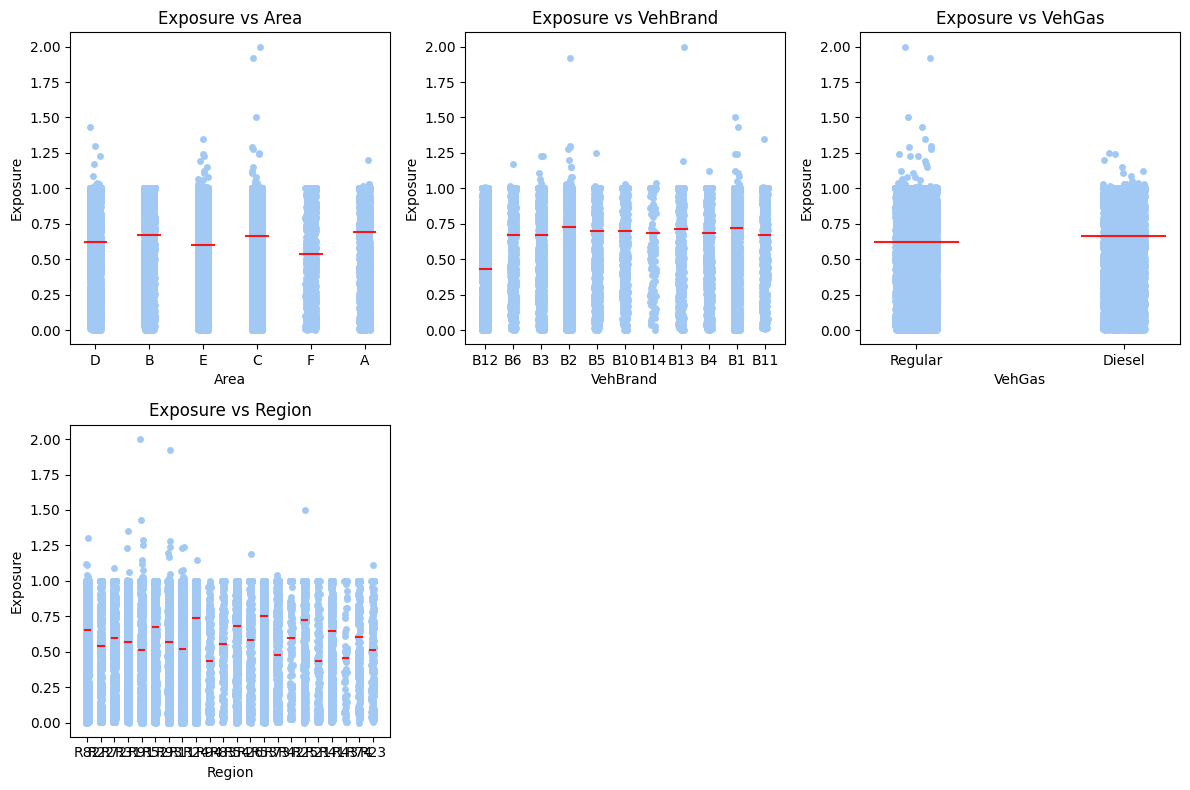

In [50]:
display_stripplots(data=df_freq_positive, y="Exposure", variables=["Area", "VehBrand", "VehGas", "Region"])

In [51]:
df_freq["VehPowerDriverAge"] = df_freq["VehPower"]/df_freq["DrivAge"]

In [52]:
variables=["VehPower", "VehAge", "DrivAge", "BonusMalus", "Density"]
for i in variables:
    df_freq[f"Transform{i}"] = np.log(df_freq[i])

d:\Projects\PricingRecrutationProject\FrequencyOfClaimsPrediction\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


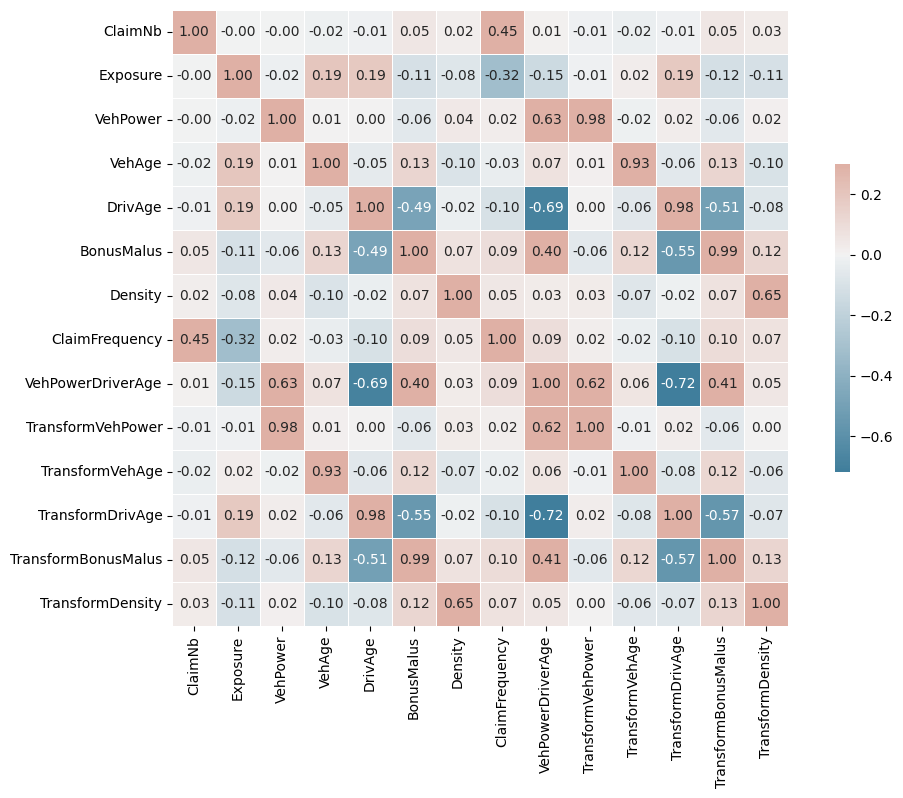

In [53]:
display_correlation_matrix(df_freq[df_freq["ClaimFrequency"] > 0])

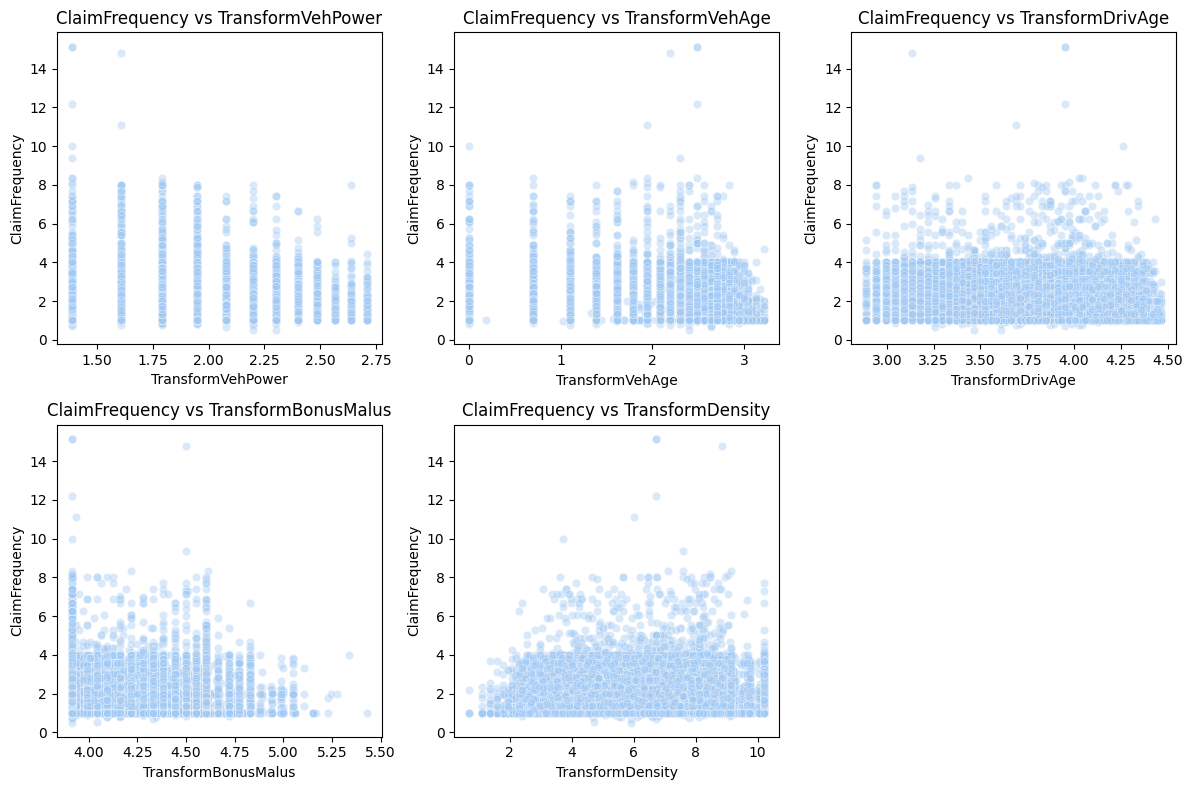

In [54]:
display_scatterplots(y="ClaimFrequency",data=df_freq[df_freq["ClaimFrequency"] > 0], variables=["TransformVehPower", "TransformVehAge", "TransformDrivAge", "TransformBonusMalus", "TransformDensity"])

In [ ]:
df_freq.drop(["BonusMalus", "Density", "TransformVehPower", "TransformDrivAge", "TransformVehAge"], axis=1, inplace=True)

In [59]:
df_freq.to_csv("feature_selected_data.csv")